In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option("display.max_columns", None)

In [2]:
loan_dataframe = pd.read_csv(filepath_or_buffer="loan.csv", low_memory=False)

In [3]:
loan_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
loan_dataframe.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
loan_dataframe.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
data = dict()
for each_column in list(loan_dataframe.columns):
    data[each_column] = loan_dataframe[each_column].value_counts(dropna=False)

In [7]:
data

{'id': 1077501    1
 568534     1
 568659     1
 567165     1
 568531     1
           ..
 785667     1
 785659     1
 785630     1
 785626     1
 87023      1
 Name: id, Length: 39717, dtype: int64,
 'member_id': 1296599    1
 731393     1
 731544     1
 729629     1
 731390     1
           ..
 989001     1
 988993     1
 988959     1
 988954     1
 86999      1
 Name: member_id, Length: 39717, dtype: int64,
 'loan_amnt': 10000    2833
 12000    2334
 5000     2051
 6000     1908
 15000    1895
          ... 
 22875       1
 8175        1
 19475       1
 21225       1
 22550       1
 Name: loan_amnt, Length: 885, dtype: int64,
 'funded_amnt': 10000    2741
 12000    2244
 5000     2040
 6000     1898
 15000    1784
          ... 
 26250       1
 24725       1
 31750       1
 22625       1
 22350       1
 Name: funded_amnt, Length: 1041, dtype: int64,
 'funded_amnt_inv': 5000.000000     1309
 10000.000000    1275
 6000.000000     1200
 12000.000000    1069
 8000.000000      900
      

In [8]:
# Dropping the columns which only have NaN values.
loan_dataframe.dropna(axis=1, thresh=(loan_dataframe.shape[0] // 2), inplace=True)
loan_dataframe.shape

(39717, 54)

In [9]:
loan_dataframe.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [10]:
loan_dataframe["int_rate_in_percentage"] = loan_dataframe["int_rate"].apply(
    lambda x: "".join(re.findall(r"[-+]?\d*\.?\d+|[-+]?\d+", x))
)
loan_dataframe.int_rate_in_percentage = loan_dataframe.int_rate_in_percentage.astype(
    float
)

In [11]:
loan_dataframe["term_in_years"] = loan_dataframe["term"].apply(
    lambda x: "".join(filter(str.isdigit, x))
)
loan_dataframe.term_in_years = loan_dataframe.term_in_years.astype("int64")

In [12]:
loan_dataframe.drop(["int_rate", "term"], axis=1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,int_rate_in_percentage,term_in_years
0,1077501,1296599,5000,5000,4975.0,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,10.65,36
1,1077430,1314167,2500,2500,2500.0,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,15.27,60
2,1077175,1313524,2400,2400,2400.0,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,15.96,36
3,1076863,1277178,10000,10000,10000.0,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,13.49,36
4,1075358,1311748,3000,3000,3000.0,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12.69,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,13,0,7274,13.10%,40,f,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN,8.07,36
39713,90665,90607,8500,8500,875.0,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,6,0,8847,26.90%,9,f,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN,10.28,36
39714,90395,90390,5000,5000,1325.0,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,11,0,9698,19.40%,20,

<Axes: xlabel='loan_status', ylabel='count'>

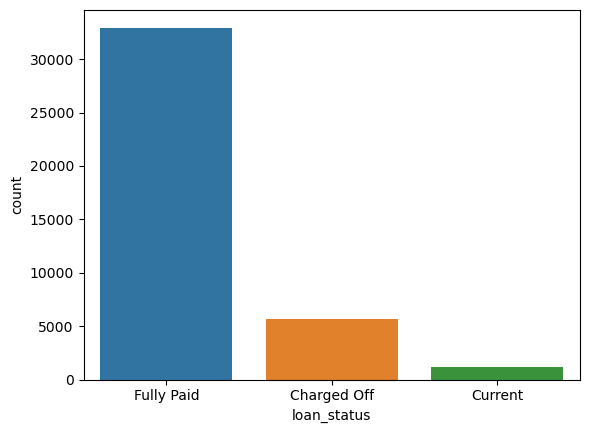

In [13]:
sns.countplot(data=loan_dataframe, x="loan_status")

In [14]:
loan_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

<Axes: xlabel='grade', ylabel='count'>

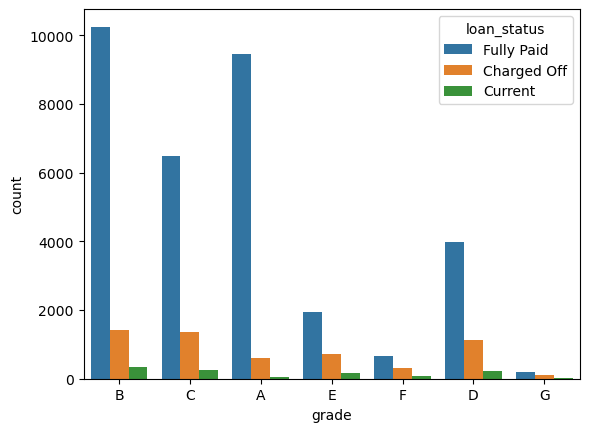

In [15]:
sns.countplot(
    data=loan_dataframe,
    x="grade",
    hue="loan_status",
)

As the grade changes from A to G, the ratio between the Charged Off customers and Fully Paid customers increases i.e. chances that the customer will will be charged off increases if he/she is from a lower grade.

In [16]:
for grade in loan_dataframe.grade.unique():
    print(
        grade,
        f'{(loan_dataframe[loan_dataframe["grade"] == grade].loan_status.value_counts()[1] / loan_dataframe[loan_dataframe["grade"] == grade].loan_status.value_counts()[0] * 100)}%',
    )

B 13.902439024390246%
C 20.76460613534762%
A 6.375092661230541%
E 36.70431211498973%
F 48.55403348554033%
D 28.182505671792285%
G 51.010101010101%


<Axes: xlabel='home_ownership', ylabel='count'>

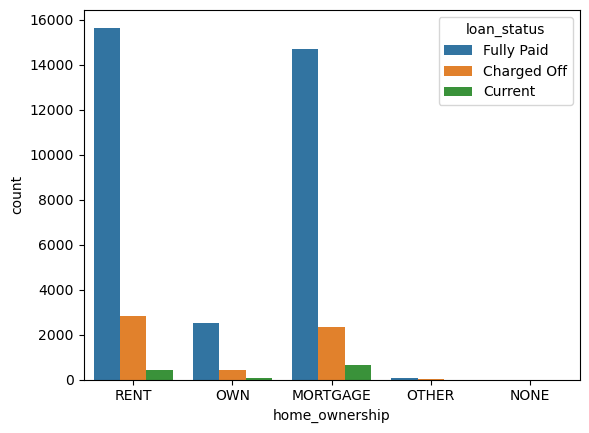

In [17]:
sns.countplot(data=loan_dataframe, x="home_ownership", hue="loan_status")

In [18]:
for home_ownership in loan_dataframe.home_ownership.unique():
    if (
        len(
            loan_dataframe[
                loan_dataframe["home_ownership"] == home_ownership
            ].loan_status.value_counts()
        )
        > 1
    ):
        print(
            home_ownership,
            f'{(loan_dataframe[loan_dataframe["home_ownership"] == home_ownership].loan_status.value_counts()[1] / loan_dataframe[loan_dataframe["home_ownership"] == home_ownership].loan_status.value_counts()[0] * 100)}%',
        )

RENT 18.151013362316988%
OWN 17.49605055292259%
MORTGAGE 15.836395807812712%
OTHER 22.5%


The maximum number of customers applying for loan are the once who are living either on rent or are paying a mortgage.
More than 18.15% of fully paid customer and are on rent have been charged off.
More than 15.83% of fully paid customer and are on mortgage have been charged off.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '< 1 year'),
  Text(1, 0, '1 year'),
  Text(2, 0, '3 years'),
  Text(3, 0, '8 years'),
  Text(4, 0, '9 years'),
  Text(5, 0, '4 years'),
  Text(6, 0, '5 years'),
  Text(7, 0, '6 years'),
  Text(8, 0, '2 years'),
  Text(9, 0, '7 years')])

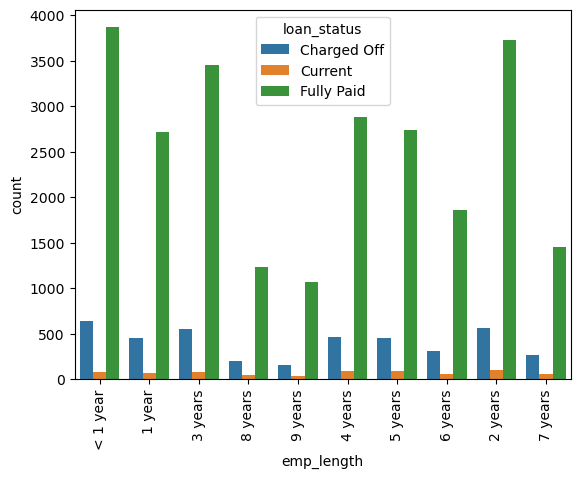

In [19]:
sns.countplot(
    data=loan_dataframe[loan_dataframe["emp_length"] != "10+ years"],
    x="emp_length",
    hue="loan_status",
)
plt.xticks(rotation=90)

In [20]:
for emp_length in loan_dataframe[
    loan_dataframe["emp_length"] != "10+ years"
].emp_length.unique():
    if (
        len(
            loan_dataframe[
                (loan_dataframe["emp_length"] == emp_length)
                & (loan_dataframe["emp_length"] != "10+ years")
            ].loan_status.value_counts()
        )
        > 1
    ):
        print(
            emp_length,
            f'{(loan_dataframe[(loan_dataframe["emp_length"] == emp_length) & (loan_dataframe["emp_length"] != "10+ years")].loan_status.value_counts()[1] / loan_dataframe[(loan_dataframe["emp_length"] == emp_length) & (loan_dataframe["emp_length"] != "10+ years")].loan_status.value_counts()[0] * 100)}%',
        )

< 1 year 16.515895580253297%
1 year 16.80796166605234%
3 years 16.054382412496384%
8 years 16.477272727272727%
9 years 14.794007490636703%
4 years 16.041666666666668%
5 years 16.739766081871345%
6 years 16.496507254164428%
2 years 15.225563909774436%
7 years 18.162983425414364%


As the employment_length increases, the number of people applying for loan decreases.
The interesting part is that the ratio of employment length of Charged Off customer and Fully Paid customer is almost similar for every category of employment length.

<Axes: xlabel='annual_inc', ylabel='Count'>

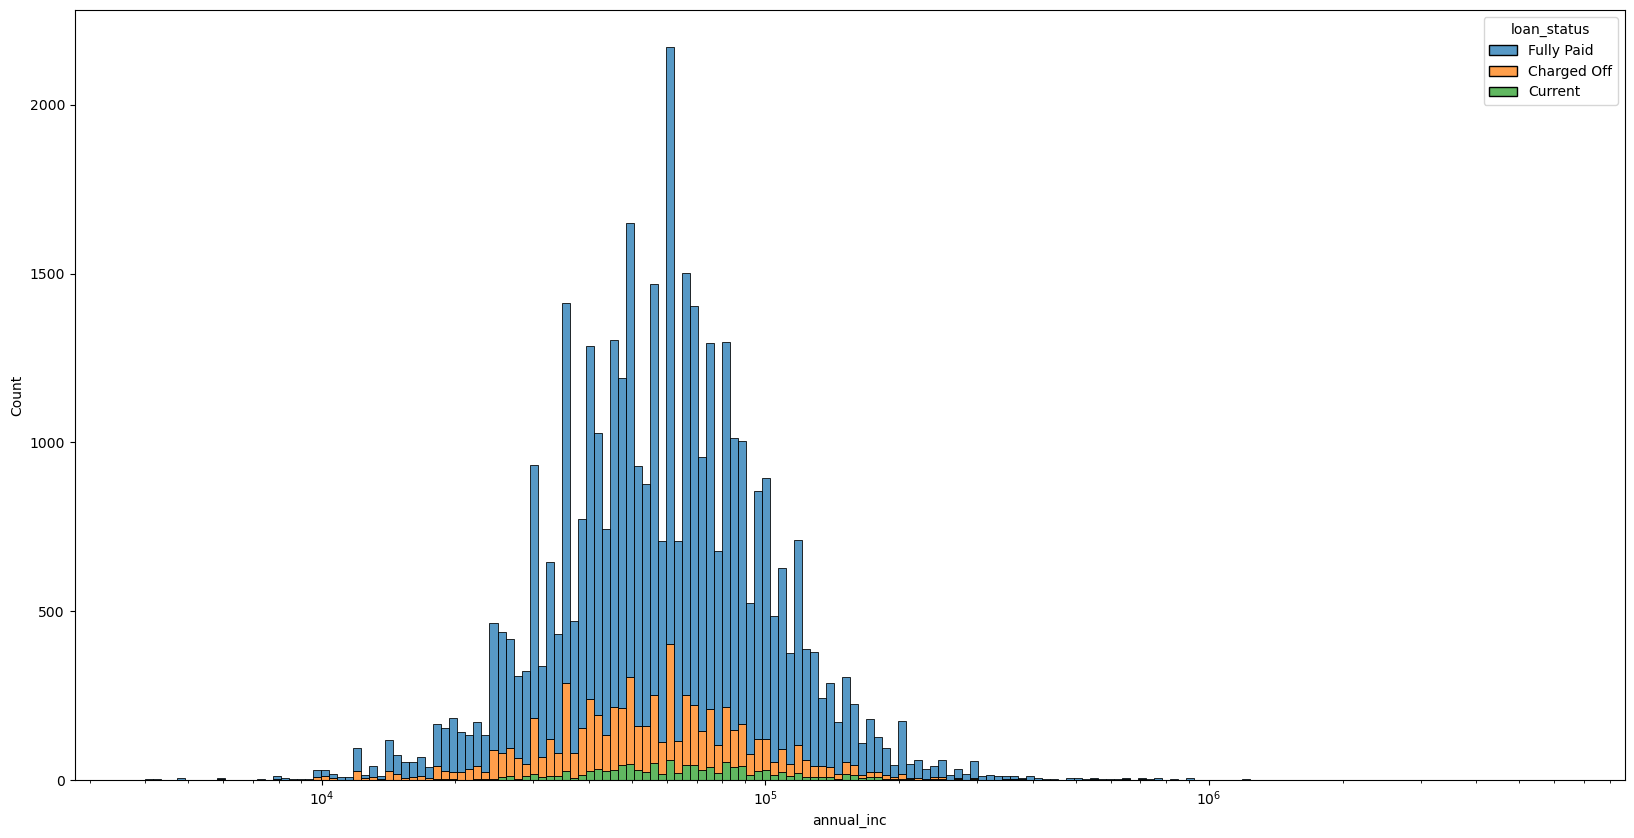

In [21]:
plt.figure(figsize=(20, 10))
sns.histplot(
    data=loan_dataframe,
    x="annual_inc",
    hue="loan_status",
    log_scale=True,
    multiple="stack",
)

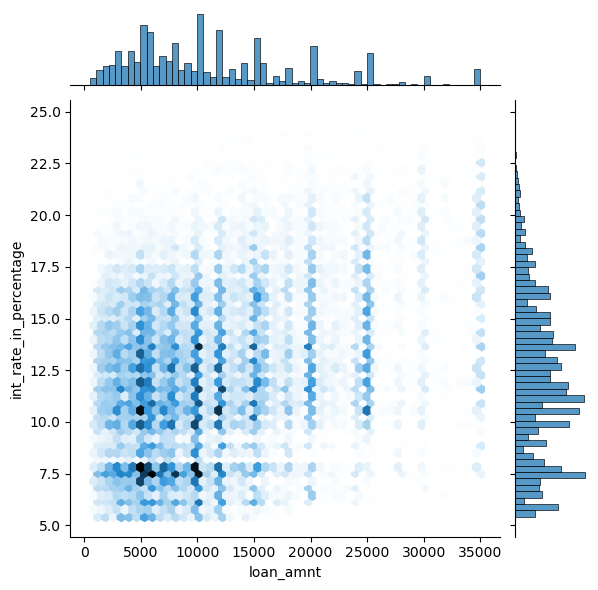

In [22]:
sns.jointplot(
    data=loan_dataframe, x="loan_amnt", y="int_rate_in_percentage", kind="hex"
)

Maximum number of loan applicants are the ones with loan amount around 5000 and 7.5% interest rate.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'AZ'),
  Text(1, 0, 'GA'),
  Text(2, 0, 'IL'),
  Text(3, 0, 'CA'),
  Text(4, 0, 'OR'),
  Text(5, 0, 'NC'),
  Text(6, 0, 'TX'),
  Text(7, 0, 'VA'),
  Text(8, 0, 'MO'),
  Text(9, 0, 'CT'),
  Text(10, 0, 'UT'),
  Text(11, 0, 'FL'),
  Text(12, 0, 'NY'),
  Text(13, 0, 'PA'),
  Text(14, 0, 'MN'),
  Text(15, 0, 'NJ'),
  Text(16, 0, 'KY'),
  Text(17, 0, 'OH'),
  Text(18, 0, 'SC'),
  Text(19, 0, 'RI'),
  Text(20, 0, 'LA'),
  Text(21, 0, 'MA'),
  Text(22, 0, 'WA'),
  Text(23, 0, 'WI'),
  Text(24, 0, 'AL'),
  Text(25, 0, 'CO'),
  Text(26, 0, 'KS'),
  Text(27, 0, 'NV'),
  Text(28, 0, 'AK'),
  Text(29, 0, 'MD'),
  Text(30, 0, 'WV'),
  Text(31, 0, 'VT'),
  Text(32, 0, 'MI'),
  Text(33, 0, 'DC'),
  Text(34, 0, 'SD'),
  Text(35, 0, 'NH'),
  Text(36, 0, 'AR'),
  Text(

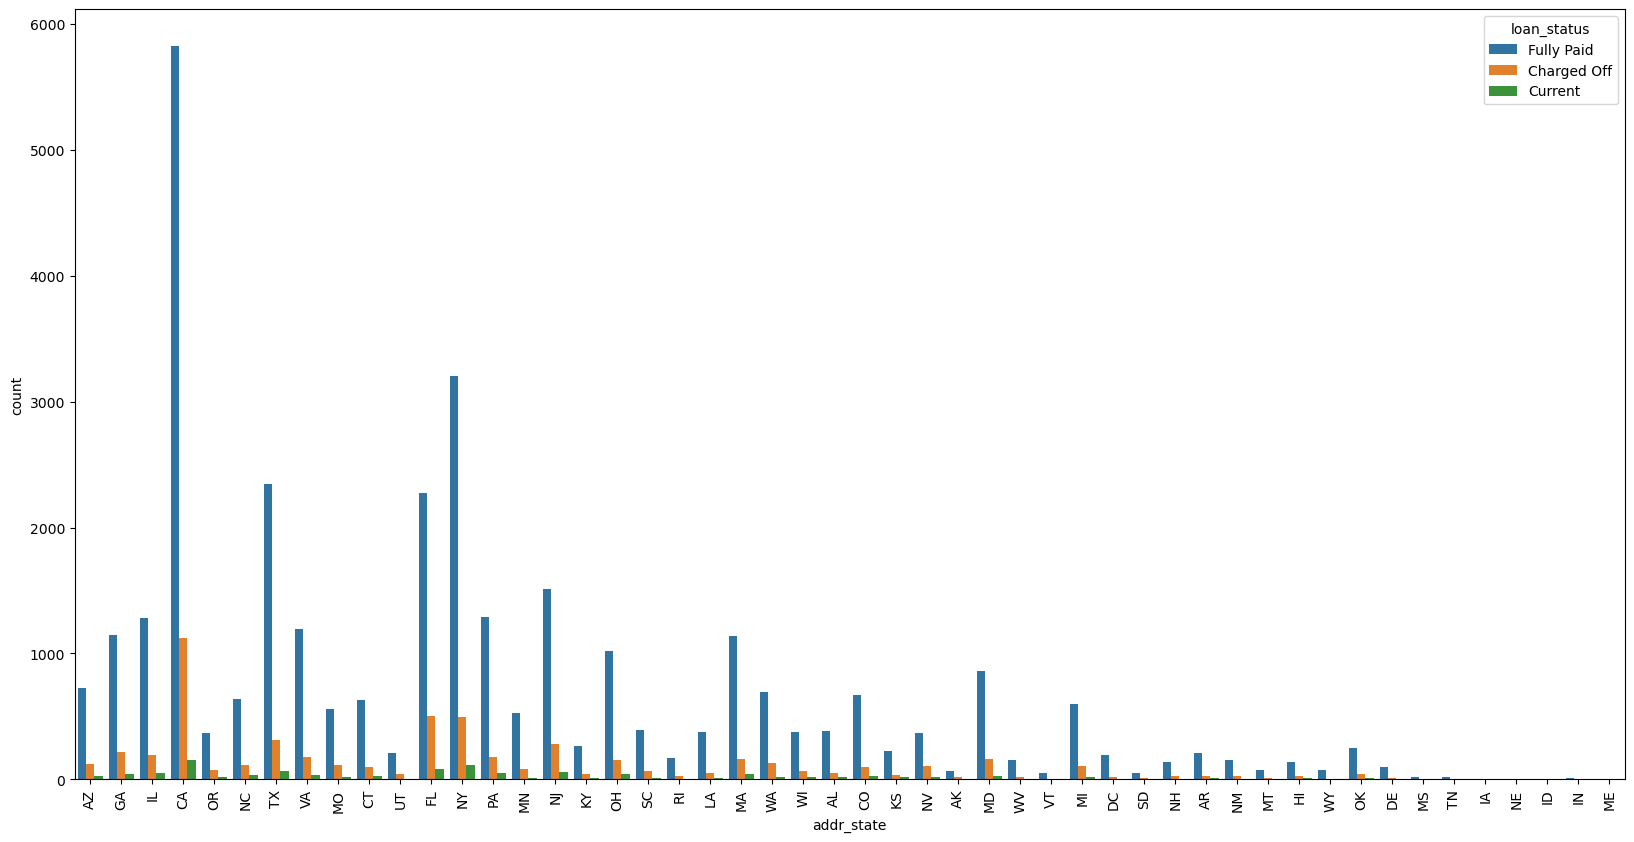

In [23]:
plt.figure(figsize=(20, 10))
sns.countplot(data=loan_dataframe, x="addr_state", hue="loan_status")
plt.xticks(rotation=90)

In [24]:
for addr_state in loan_dataframe.addr_state.unique():
    if (
        len(
            loan_dataframe[
                loan_dataframe["addr_state"] == addr_state
            ].loan_status.value_counts()
        )
        > 1
    ):
        print(
            addr_state,
            f'{(loan_dataframe[loan_dataframe["addr_state"] == addr_state].loan_status.value_counts()[1] / loan_dataframe[loan_dataframe["addr_state"] == addr_state].loan_status.value_counts()[0] * 100)}%',
        )

AZ 16.94214876033058%
GA 18.793706293706293%
IL 15.378610460577674%
CA 19.31662087912088%
OR 19.505494505494507%
NC 17.92452830188679%
TX 13.486982501067008%
VA 14.848993288590604%
MO 20.503597122302157%
CT 14.873417721518987%
UT 18.867924528301888%
FL 22.134387351778656%
NY 15.454261629722135%
PA 13.975155279503104%
MN 15.458015267175574%
NJ 18.386243386243386%
KY 16.917293233082706%
OH 15.151515151515152%
SC 16.793893129770993%
RI 14.792899408284024%
LA 14.171122994652407%
MA 13.971880492091387%
WA 18.37916063675832%
WI 16.710875331564985%
AL 14.173228346456693%
CO 14.67065868263473%
KS 13.839285714285715%
NV 29.110512129380055%
AK 23.809523809523807%
MD 18.81533101045296%
WV 13.90728476821192%
VT 12.76595744680851%
MI 17.13810316139767%
DC 7.653061224489796%
SD 24.0%
NH 17.73049645390071%
AR 12.980769230769232%
NM 19.607843137254903%
MT 15.277777777777779%
HI 20.28985507246377%
WY 5.263157894736842%
OK 16.194331983805668%
DE 11.881188118811881%
MS 11.76470588235294%
TN 13.3333333333

CA is the state with most number of Fully Paid customers and Charged Off customers as well.

In [25]:
loan_dataframe[
    (loan_dataframe["loan_status"] == "Charged Off")
    & (loan_dataframe["verification_status"] == "Verified")
]["emp_title"].value_counts()

Bank of America             14
Walmart                     12
UPS                         10
US Postal Service            7
IBM                          7
                            ..
1 Cochran Hyundai            1
Henry Ford Health System     1
Dept of Corrections, CMC     1
McDonald's                   1
Professional Polymers        1
Name: emp_title, Length: 1690, dtype: int64

In [26]:
loan_dataframe[
    (loan_dataframe["loan_status"] == "Charged Off")
    & (loan_dataframe["verification_status"] == "Source Verified")
]["emp_title"].value_counts()

US Army                       8
AT&T                          5
US Air Force                  4
USMC                          4
Bank of America               4
                             ..
VHQC                          1
United States Navy            1
m/s tube technologies         1
Black Rabbit Bar              1
Texas Business Source, Inc    1
Name: emp_title, Length: 1289, dtype: int64

An interesting finding over here. The maximum number of employees who have been Charged Off and are Verified or Source Verified are titled as Bank of America, US Army, Walmart, etc. This seems to be alarming.